In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv("BMW_Cleaned_Preprocessed.csv")
df.head(5)

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Model_5 Series,Model_7 Series,Model_M3,Model_M5,...,Region_South America,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual
0,2016,3,151748,98740,8300,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,2013,1,121671,79219,3428,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2022,4,10991,113265,6994,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2024,1,27255,60971,4047,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2020,2,122131,49898,3080,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [2]:
x = df.drop(["Sales_Classification","Sales_Volume"], axis=1)
y = df["Sales_Classification"]

In [3]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [4]:
print("Class distribution after resampling:")
print(y_resampled.value_counts())

Class distribution after resampling:
Sales_Classification
0    34754
1    34754
Name: count, dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.2, random_state=42)

In [6]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    class_weight="balanced"
)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=300,
                       random_state=42)

In [7]:
y_pred = model.predict(x_test)

 Model Accuracy : 73.98216084016688

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.58      0.69      6990
           1       0.68      0.91      0.78      6912

    accuracy                           0.74     13902
   macro avg       0.77      0.74      0.73     13902
weighted avg       0.77      0.74      0.73     13902


Confusion Matrix:



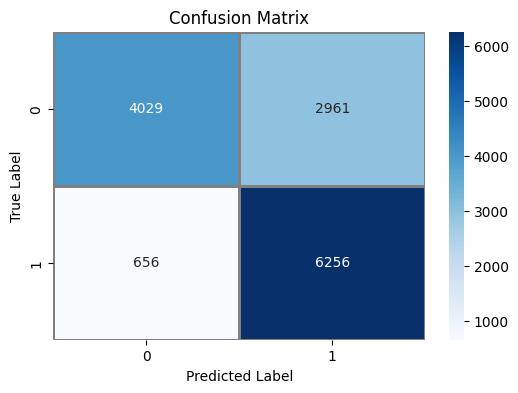

In [9]:
print(' Model Accuracy :', accuracy_score(y_test, y_pred)*100)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n')
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor='gray')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()